In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

In [25]:
X,y = make_moons(n_samples=500, noise=0.1)

In [26]:
X[:5]

array([[ 0.44283334, -0.35409349],
       [ 0.91530848, -0.40514421],
       [ 0.89818821,  0.12515095],
       [ 0.34401917, -0.10179301],
       [ 2.02390995,  0.06130939]])

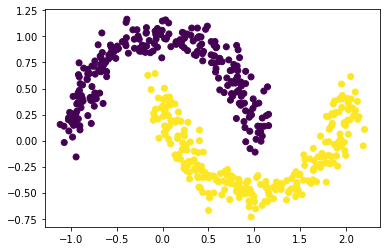

In [27]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [28]:
def plot_boundary(predict):
    x1 = np.arange(min(X[:, 0]) - 1, max(X[:, 0]) + 1, step=0.01)
    x2 = np.arange(min(X[:, 1]) - 1, max(X[:, 1]) + 1, step=0.01)
    
    xx, yy = np.meshgrid(x1, x2)
    arr = np.array([xx.flatten(), yy.flatten()]).T
    z = predict(arr)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap = ListedColormap(('gray', 'red')))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

In [29]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

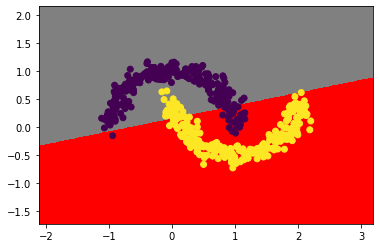

In [30]:
plot_boundary(lambda x : logistic.predict(x))

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = logistic.predict(X)
accuracy_score(y, y_pred)

0.886

In [33]:
svm = SVC()
svm.fit(X, y)

SVC()

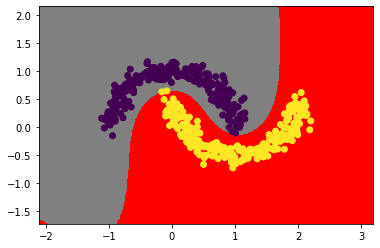

In [34]:
plot_boundary(lambda x : svm.predict(x))

In [35]:
y_pred = svm.predict(X)
accuracy_score(y, y_pred)

0.996

In [ ]:
def buildModel(inputNeurons, hiddenNeurons, epochs, alpha):
    weightsHidden = np.random.uniform(size=(inputNeurons, hiddenNeurons))
    biasHidden = np.random.uniform(size=(1, hiddenNeurons))
    weightsOutput = np.random.uniform(size=(hiddenNeurons, outputNeurons))
    biasOutput = np.random.uniform(size=(1, outputNeurons))
    
    model = {}
    
    for i in range(epochs):
        fx = np.dot(x, weightsHidden) + biasHidden
        hiddenLayer = np.tanh(fx)
        fx1 = np.dot(hiddenLayer, weightsOutput) + biasOutput
        exp_score = np.exp(fx1)
        prob = exp_score / np.sum(exp_score, axis=1, keepdims=True)
        
        